<a href="https://colab.research.google.com/github/tejaimanyvong/publicdsba6156/blob/main/EDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part** **A — Data Intake & Quality Audit**

## A1) Load & Schema Check
Action:

Inspect column names, types, and nulls; parse timestamps for TransactionDate and PreviousTransactionDate.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DSBA6156/bank_transactions_data_2.csv')

# **THE BELOW CODE IS FOR MOUNTING GDRIVE SO ACCESS CAN BE GRANTED**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


After running the cell, you will be prompted to authorize Colab to access your Google Drive. Follow the instructions in the output.

This code first calculates the time difference between `TransactionDate` and `PreviousTransactionDate` for each transaction, converts this difference into total seconds, and stores it in a new column named `delta_t`. Then, it generates a box plot of this `delta_t` column using Seaborn. This plot helps to visualize the distribution of time intervals between transactions, allowing for the identification of typical intervals and outliers like high-frequency bursts.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [6]:
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [7]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate']) # this code transforms transaction date (datatype) to datetime format

In [8]:
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

In [9]:
assert df['TransactionID'].is_unique


## A2) Integrity & Consistency

Action: Check uniqueness (TransactionID), reasonableness of numeric ranges (e.g., amounts non-negative), and categorical value sets (TransactionType, Channel).

Hints (Python):

Packages: pandas.

Code:

assert df['TransactionID'].is_unique

(df['TransactionAmount'] < 0).sum()

df['TransactionType'].value_counts()

df['Channel'].value_counts()

In [10]:
assert df['TransactionID'].is_unique


In [11]:
(df['TransactionAmount'] < 0).sum()

np.int64(0)

In [12]:
df['TransactionType'].value_counts()

,count
TransactionType,
Debit,1944
Credit,568


In [13]:
df['Channel'].value_counts()

,count
Channel,
Branch,868
ATM,833
Online,811


# A3) Basic Profiling
Action: Produce summary statistics and visualize missing data.

Hints (Python):

- Packages: pandas, seaborn, matplotlib.

- Code:
  
  df.describe(include='all')
  
  import seaborn as sns, matplotlib.pyplot as plt
  
  sns.heatmap(df.isna(), cbar=False); plt.title('Missing Values Heatmap')

In [14]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,NaN,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,NaN
top,TX002496,AC00460,NaN,NaN,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,NaN
freq,1,12,NaN,NaN,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,NaN
mean,NaN,NaN,297.593778,2023-07-05 20:32:10.826433024,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,NaN,NaN,0.260000,2023-01-02 16:00:06,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,NaN,NaN,81.885000,2023-04-03 16:22:05.750000128,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,NaN,NaN,211.140000,2023-07-07 17:49:43.500000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,NaN,NaN,414.527500,2023-10-06 18:40:53.500000,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,NaN,NaN,1919.110000,2024-01-01 18:21:50,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,300.000000,5.000000,14977.990000,2024-11-04 08:12:23


In [15]:
import seaborn as sns, matplotlib.pyplot as plt

Text(0.5, 1.0, 'Missing Values Heatmap')

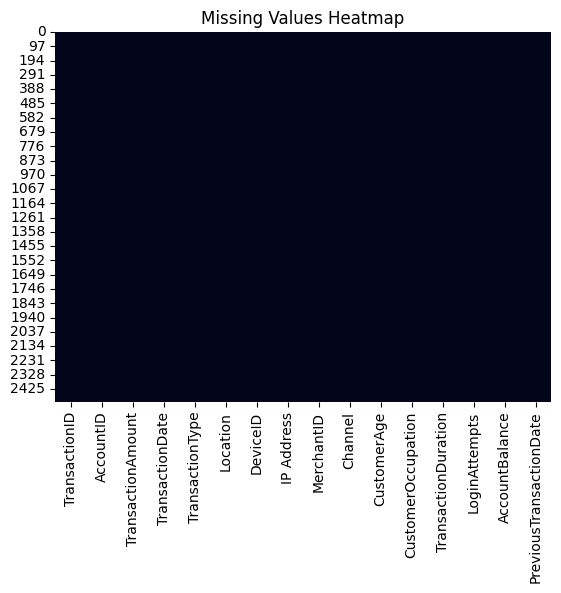

In [16]:
sns.heatmap(df.isna(), cbar=False); plt.title('Missing Values Heatmap')

# **Part B — Business-Oriented EDA**

Text(0.5, 1.0, 'Transactions per Account')

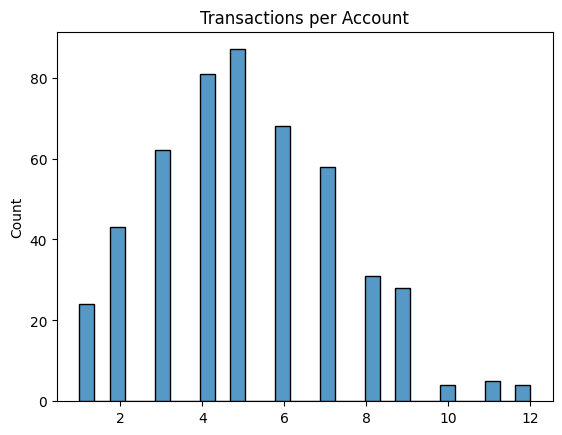

In [17]:
# B1) Activity by Account

# Action: Compute transactions per account; identify top accounts by volume; assess distribution shape (long tail vs even spread).

# Hints (Python):

# - Packages: pandas, seaborn, matplotlib.

# - Code:

tx_per_acct = df.groupby('AccountID').size().sort_values(ascending=False)
tx_per_acct.head(10)
sns.histplot(tx_per_acct, bins=30); plt.title('Transactions per Account')

In [18]:
tx_per_acct = df.groupby('AccountID').size().sort_values(ascending=False)

In [19]:
tx_per_acct.head(10)

,0
AccountID,
AC00460,12
AC00363,12
AC00362,12
AC00202,12
AC00480,11
AC00257,11
AC00225,11
AC00456,11
AC00304,11


Text(0.5, 1.0, 'Transactions per Account')

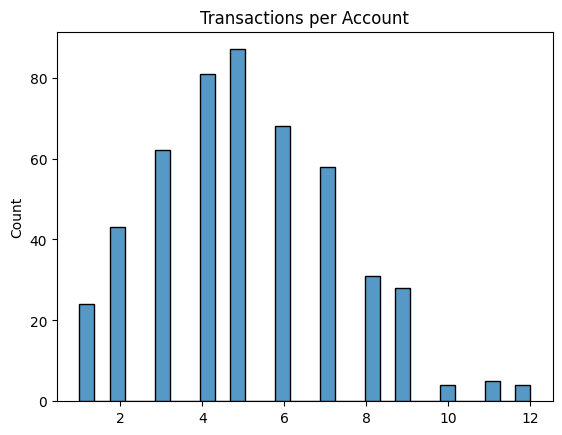

In [20]:
sns.histplot(tx_per_acct, bins=30); plt.title('Transactions per Account')

## B2) Time Spacing Between Transactions

Action:

Compute delta_t = TransactionDate - PreviousTransactionDate; profile high-frequency bursts and typical intervals.

Hints (Python):

- Packages: pandas, numpy, seaborn.

- Code:
  df['delta_t'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()
  sns.boxplot(x=df['delta_t']); plt.title('Inter-Transaction Seconds')

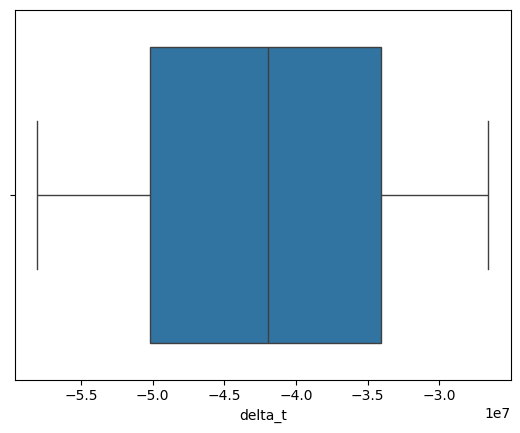

In [21]:
df['delta_t'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()
sns.boxplot(x=df['delta_t']);

Text(0.5, 1.0, 'Inter-Transaction Seconds')

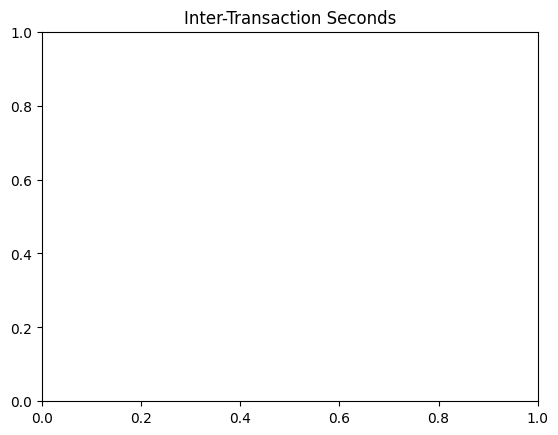

In [22]:
plt.title('Inter-Transaction Seconds')

## B3) Geographic Sanity Checks (City)

Action: Count distinct accounts per city and total transactions per city; flag cities with unexpected ranks (e.g., Raleigh exceeding NYC).

Hints (Python):

- Packages: pandas, seaborn, matplotlib.

- Code:
  
  accounts_per_city = df.groupby('Location')['AccountID'].nunique().sort_valu(ascending=False)
  
  tx_per_city = df.groupby('Location').size().sort_values(ascending=False)
  
  sns.barplot(x=accounts_per_city.index, y=accounts_per_city.values)
  
  plt.xticks(rotation=90); plt.title('Accounts per City')

In [23]:
accounts_per_city = df.groupby('Location')['AccountID'].nunique().sort_values(ascending=False)

In [24]:
tx_per_city = df.groupby('Location').size().sort_values(ascending=False)


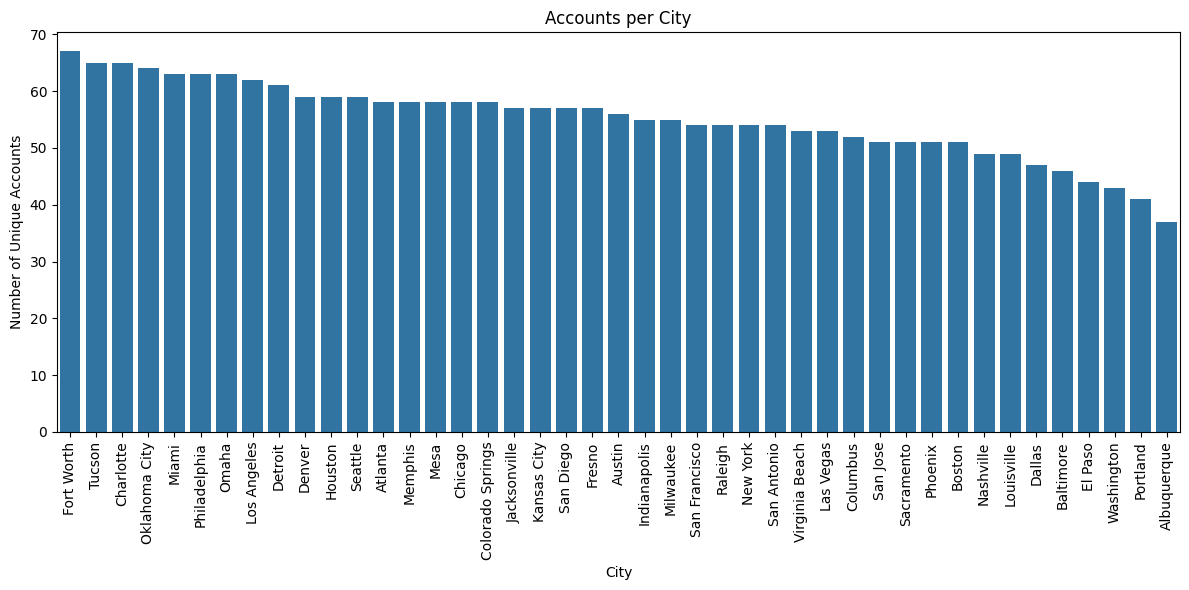

In [25]:
plt.figure(figsize=(12, 6)) # Optional: set figure size for better readability
sns.barplot(x=accounts_per_city.index, y=accounts_per_city.values)
plt.xticks(rotation=90)
plt.title('Accounts per City')
plt.xlabel('City') # Add x-axis label
plt.ylabel('Number of Unique Accounts') # Add y-axis label
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

In [ ]:
# This cell is no longer needed as its content has been moved to cell 3rOjf9z8AQXt

## B4) Merchant Concentration

Action:

Identify top merchants by count and amount; compute merchant diversity per account (unique merchants/account).

Hints (Python):

- Packages: pandas, seaborn.

- Code:
  
  top_merchants = df.groupby('MerchantID')['TransactionAmount'].agg(['count','sum']).sort_values('count', ascending=False)
  
  merch_diversity = df.groupby('AccountID')['MerchantID'].nunique()
  
  sns.histplot(merch_diversity, bins=30); plt.title('Merchant Diversity per Account')

In [26]:
top_merchants = df.groupby('MerchantID')['TransactionAmount'].agg(['count','sum']).sort_values('count', ascending=False)

In [27]:
merch_diversity = df.groupby('AccountID')['MerchantID'].nunique()

Text(0.5, 1.0, 'Merchant Diversity per Account')

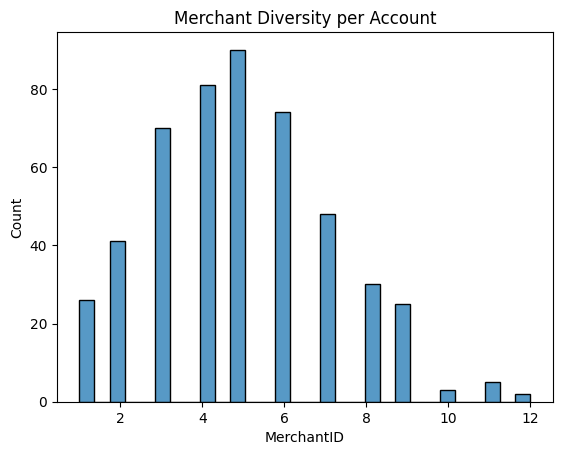

In [28]:
sns.histplot(merch_diversity, bins=30); plt.title('Merchant Diversity per Account')

##B5) Channel Mix & Journey Metrics

Action:

Compare volume and amounts across channels (Online/ATM/Branch); analyze typical durations and login attempts across channels.

Hints (Python):

- Packages: pandas, seaborn.

- Code:

  channel_summary = df.groupby('Channel').agg({'TransactionAmount':['count','sum'], 'TransactionDuration':'median', 'LoginAttempts':'median'})

  sns.barplot(x='Channel', y='TransactionAmount', data=df, estimator=sum); plt.title('Amount by Channel (Sum)')

In [29]:
channel_summary = df.groupby('Channel').agg({'TransactionAmount':['count','sum'], 'TransactionDuration':'median', 'LoginAttempts':'median'})

Text(0.5, 1.0, 'Amount by Channel (Sum)')

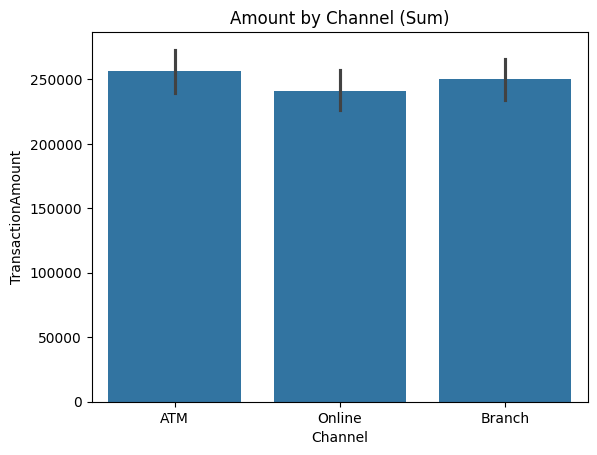

In [30]:
sns.barplot(x='Channel', y='TransactionAmount', data=df, estimator=sum); plt.title('Amount by Channel (Sum)')

# B6) Device & IP Reuse

Action:

Measure the number of accounts per DeviceID and per IP address; inspect cross-account sharing patterns.

Hints (Python):

- Packages: pandas.

- Code:
  
  accounts_per_device = df.groupby('DeviceID')['AccountID'].nunique().sort_values(ascending=False)
  
  accounts_per_ip = df.groupby('IP Address')['AccountID'].nunique().sort_values(ascending=False)

In [31]:
accounts_per_device = df.groupby('DeviceID')['AccountID'].nunique().sort_values(ascending=False)

In [32]:
accounts_per_ip = df.groupby('IP Address')['AccountID'].nunique().sort_values(ascending=False)

# B7) Temporal Patterns

Action:

Analyze hourly/daily/weekday trends; identify spikes around odd hours, weekends, end-of-month.

Hints (Python):

- Packages: pandas, seaborn, matplotlib, pandas.Grouper.

- Code:
  
  df['hour'] = df['TransactionDate'].dt.hour
  
  df['weekday'] = df['TransactionDate'].dt.day_name()
  
  sns.countplot(x='hour', data=df); plt.title('Transactions by Hour')
  
  daily = df.set_index('TransactionDate').groupby(pd.Grouper(freq='D')).size()
  
  daily.plot(title='Daily Transaction Counts')

In [ ]:
df['hour'] = df['TransactionDate'].dt.hour

In [ ]:
df['weekday'] = df['TransactionDate'].dt.day_name()

Text(0.5, 1.0, 'Transactions by Hour')

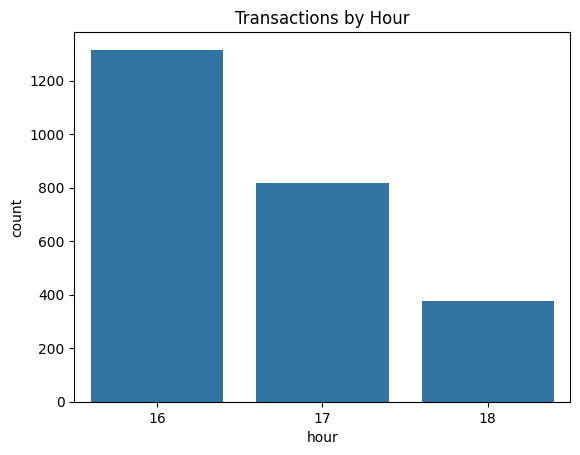

In [ ]:
sns.countplot(x='hour', data=df); plt.title('Transactions by Hour')

In [ ]:
daily = df.set_index('TransactionDate').groupby(pd.Grouper(freq='D')).size()

<Axes: title={'center': 'Daily Transaction Counts'}, xlabel='TransactionDate'>

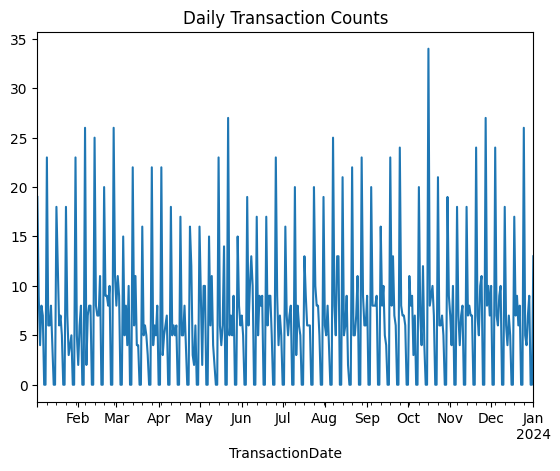

In [ ]:
daily.plot(title='Daily Transaction Counts')

#B8) Amount vs Balance Dynamics

Action:

Check reasonableness of AccountBalance changes relative to TransactionAmount and TransactionType (debit vs credit).

Hints (Python):

- Packages: pandas, numpy.

- Code:
  
  # Example expectation checks (illustrative)
  df.groupby('TransactionType')['TransactionAmount'].describe()
  
  # Create simple derived feature for analysis
  df['balance_to_amount_ratio'] = df['AccountBalance'] / (df['TransactionAmount'].replace(0, pd.NA))

In [35]:
df.groupby('TransactionType')['TransactionAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
TransactionType,,,,,,,,
Credit,568.0,306.501004,290.027618,2.03,80.0125,223.36,425.220,1831.02
Debit,1944.0,294.991255,292.527512,0.26,83.1375,205.14,407.785,1919.11


In [36]:
df['balance_to_amount_ratio'] = df['AccountBalance'] / (df['TransactionAmount'].replace(0, pd.NA))

# Task
Validate the `TransactionAmount` versus `AccountBalance` logic by examining the distribution of `balance_to_amount_ratio`, specifically checking for extreme values, and comparing this ratio for credit and debit transactions to identify any anomalies.

## Validate Transaction Amount vs. Balance Logic

### Subtask:
Perform logical checks on the relationship between TransactionAmount, TransactionType, and AccountBalance. This involves identifying if transaction amounts are reasonable relative to the account balance, looking for extreme balance_to_amount_ratio values, and considering if debits/credits align with expected balance impacts.


**Reasoning**:
Displaying descriptive statistics for the `balance_to_amount_ratio` column will provide a summary of its central tendency, dispersion, and shape, helping to understand its overall distribution and identify any immediate anomalies.



In [37]:
print(df['balance_to_amount_ratio'].describe())

count     2512.000000
mean       115.423868
std        732.883235
min          0.126647
25%          6.593852
50%         19.259635
75%         55.063009
max      22370.562500
Name: balance_to_amount_ratio, dtype: float64


**Reasoning**:
Creating a histogram will help visualize the distribution of the `balance_to_amount_ratio` and identify any patterns, skewness, or potential anomalies that might not be apparent from descriptive statistics alone.



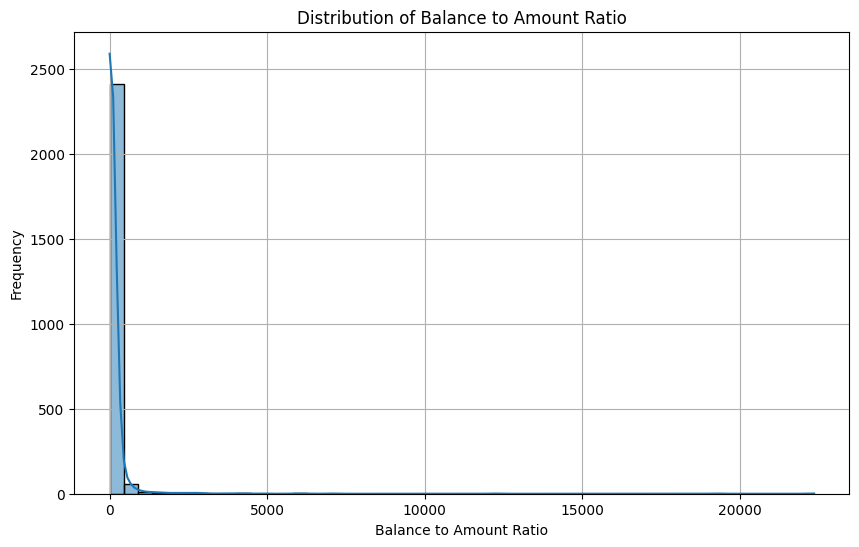

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['balance_to_amount_ratio'], bins=50, kde=True)
plt.title('Distribution of Balance to Amount Ratio')
plt.xlabel('Balance to Amount Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Reasoning**:
Creating a box plot will effectively visualize the spread, central tendency, and presence of outliers in the `balance_to_amount_ratio` data, which is crucial for identifying extreme values.



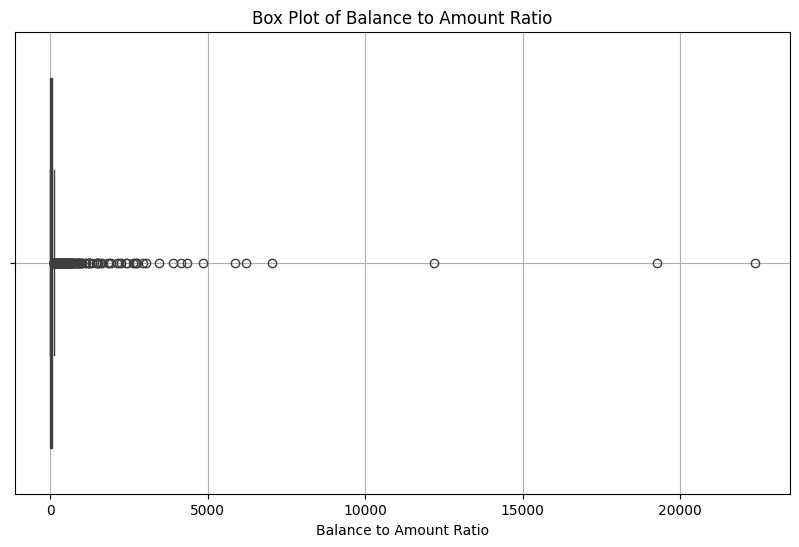

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['balance_to_amount_ratio'])
plt.title('Box Plot of Balance to Amount Ratio')
plt.xlabel('Balance to Amount Ratio')
plt.grid(True)
plt.show()

**Reasoning**:
To compare the relationship between balance and transaction amount for different transaction types, it's necessary to group the data by 'TransactionType' and then display descriptive statistics for the 'balance_to_amount_ratio' within each group.



In [40]:
print(df.groupby('TransactionType')['balance_to_amount_ratio'].describe())

                  count        mean         std       min       25%  \
TransactionType                                                       
Credit            568.0   83.636415  293.464308  0.143133  6.326161   
Debit            1944.0  124.711560  817.692449  0.126647  6.712273   

                       50%        75%           max  
TransactionType                                      
Credit           18.715527  53.451510   4146.260234  
Debit            19.394905  55.623865  22370.562500  


**Reasoning**:
To visually compare the distributions of the `balance_to_amount_ratio` for credit and debit transactions, a box plot separated by `TransactionType` will be created.



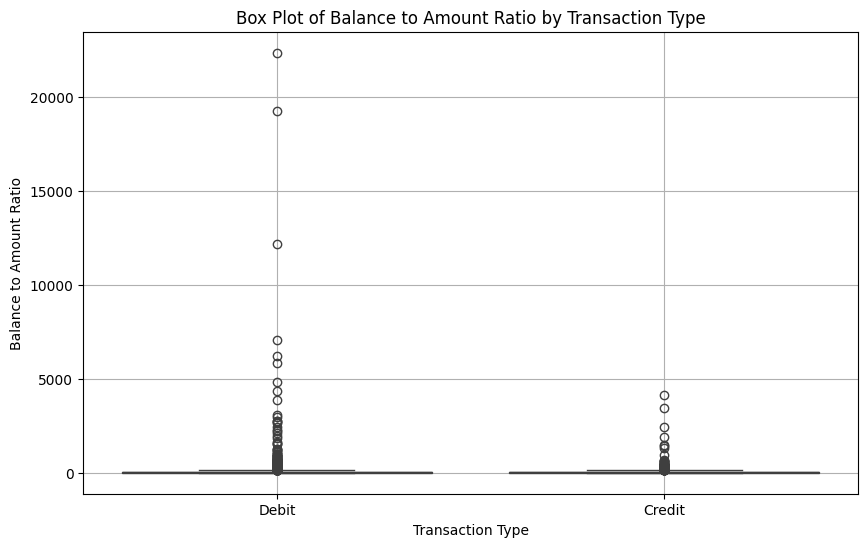

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TransactionType', y='balance_to_amount_ratio', data=df)
plt.title('Box Plot of Balance to Amount Ratio by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Balance to Amount Ratio')
plt.grid(True)
plt.show()

## Analyze Geographic Anomalies and Patterns

### Subtask:
Deep dive into the geographic data (Location) to identify any anomalies. Beyond just counts, analyze if certain cities show unexpected transaction volumes, account distributions, or average transaction amounts. For example, flag cities that have a disproportionately high number of transactions for a small number of unique accounts.


**Reasoning**:
First, I'll calculate the total number of transactions for each city and display the top 10 cities by transaction volume to understand transaction activity by location.



In [42]:
tx_per_city = df.groupby('Location').size().sort_values(ascending=False)
print("Top 10 Cities by Transaction Volume:\n", tx_per_city.head(10))

Top 10 Cities by Transaction Volume:
 Location
Fort Worth       70
Los Angeles      69
Charlotte        68
Oklahoma City    68
Philadelphia     67
Tucson           67
Omaha            65
Miami            64
Detroit          63
Memphis          63
dtype: int64


## 2. Split the Data

I will divide the dataset into training, validation, and test sets using `sklearn.model_selection.train_test_split`. The split percentages will be approximately 80% for training, 10% for validation, and 10% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into 80% for training+validation and 20% for testing
df_train_val, df_test = train_test_split(df, test_size=0.10, random_state=42)

# Split the training+validation data into 80% for training and 20% for validation
# (which means 10% of the original dataset for validation and 80% for training)
df_train, df_val = train_test_split(df_train_val, test_size=(0.10/0.90), random_state=42)

print(f"Shape of original DataFrame: {df.shape}")
print(f"Shape of training set: {df_train.shape}")
print(f"Shape of validation set: {df_val.shape}")
print(f"Shape of test set: {df_test.shape}")

**Reasoning**:
Next, I'll calculate the average transaction amount for each city and display the top 10 cities with the highest average transaction amounts to understand transaction value by location.



In [ ]:
avg_tx_amount_per_city = df.groupby('Location')['TransactionAmount'].mean().sort_values(ascending=False)
print("Top 10 Cities by Average Transaction Amount:\n", avg_tx_amount_per_city.head(10))

Top 10 Cities by Average Transaction Amount:
 Location
Austin              385.438983
El Paso             369.511957
Columbus            353.318148
Washington          351.032083
Phoenix             346.630182
Jacksonville        341.991167
San Jose            341.150339
Colorado Springs    339.077167
Portland            338.621667
Memphis             336.040159
Name: TransactionAmount, dtype: float64


**Reasoning**:
I will calculate the ratio of total transactions to unique accounts for each city and display the top 10 cities with the highest ratio to identify potential anomalies where many transactions are associated with few accounts.



In [ ]:
tx_to_account_ratio = tx_per_city / accounts_per_city
print("Top 10 Cities by Transaction-to-Unique-Account Ratio:\n", tx_to_account_ratio.sort_values(ascending=False).head(10))

Top 10 Cities by Transaction-to-Unique-Account Ratio:
 Location
Boston         1.196078
San Jose       1.156863
Nashville      1.122449
Washington     1.116279
Los Angeles    1.112903
Baltimore      1.108696
Albuquerque    1.108108
Raleigh        1.092593
San Antonio    1.092593
Memphis        1.086207
dtype: float64


**Reasoning**:
To visualize the transaction activity by location, I will create a bar plot showing the total transaction count for the top 10 cities by transaction volume.



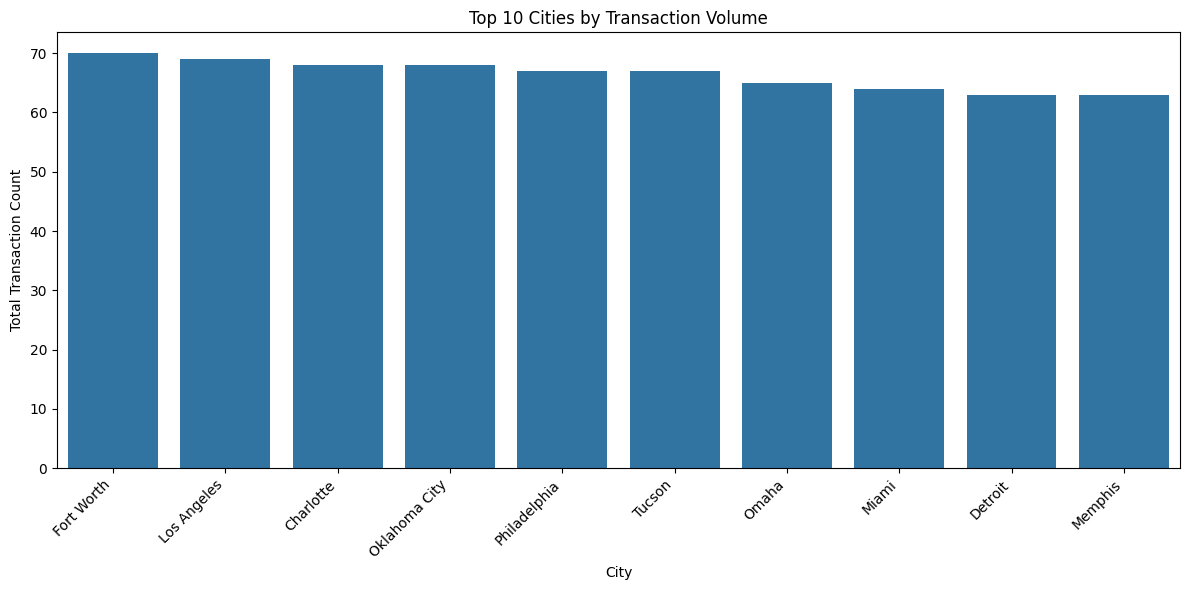

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=tx_per_city.head(10).index, y=tx_per_city.head(10).values)
plt.title('Top 10 Cities by Transaction Volume')
plt.xlabel('City')
plt.ylabel('Total Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize the average transaction amount by location, I will create a bar plot showing the average transaction amount per city for the top 10 cities with the highest average transaction amounts.



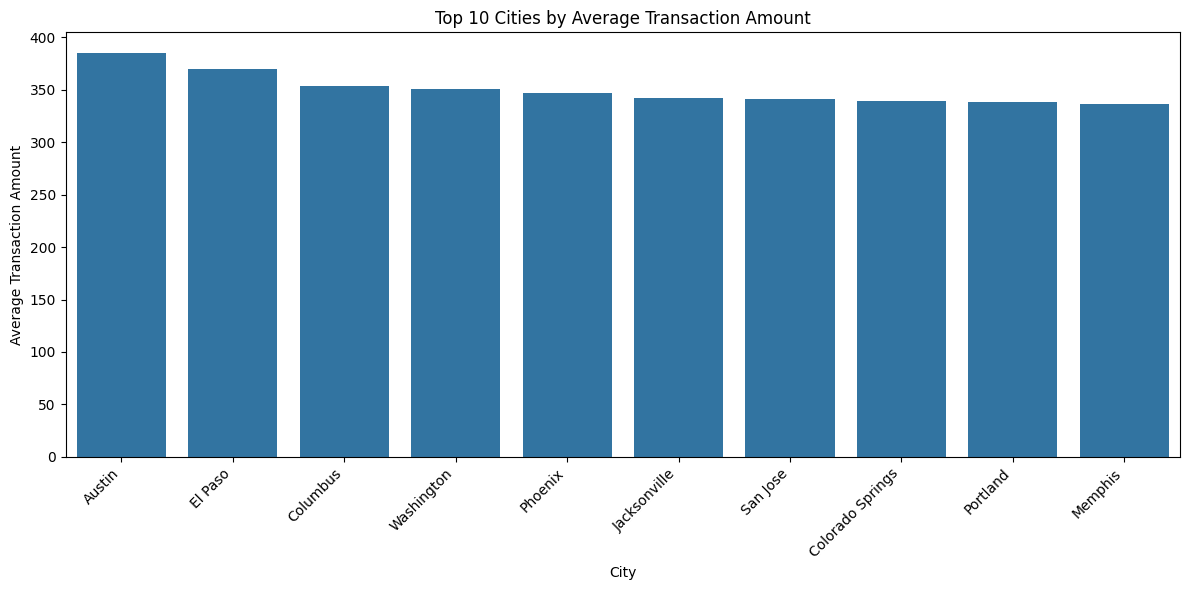

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_tx_amount_per_city.head(10).index, y=avg_tx_amount_per_city.head(10).values)
plt.title('Top 10 Cities by Average Transaction Amount')
plt.xlabel('City')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize cities with potential anomalies where many transactions are associated with few accounts, I will create a bar plot showing the ratio of total transactions to unique accounts for the top 10 cities with the highest ratio.



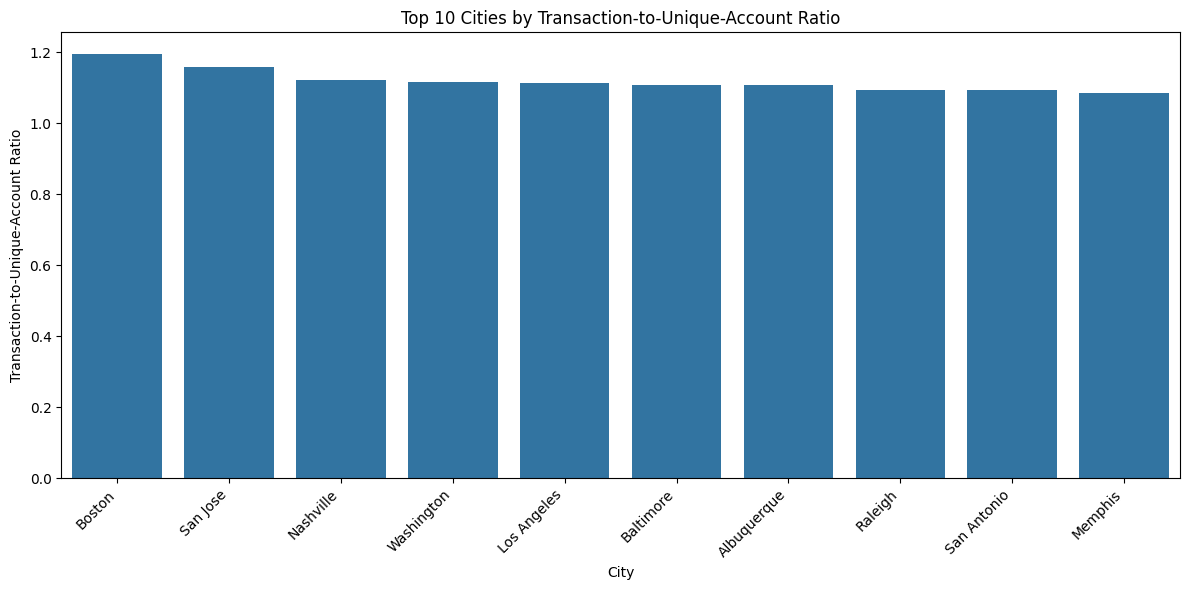

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=tx_to_account_ratio.sort_values(ascending=False).head(10).index, y=tx_to_account_ratio.sort_values(ascending=False).head(10).values)
plt.title('Top 10 Cities by Transaction-to-Unique-Account Ratio')
plt.xlabel('City')
plt.ylabel('Transaction-to-Unique-Account Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Conduct Multi-Dimensional Anomaly Exploration

### Subtask:
Perform multi-dimensional analysis to find patterns or anomalies that emerge when combining different features. This could involve identifying accounts with high transaction frequency (delta_t) and shared device/IP usage, or cross-referencing top merchants with specific locations or customer age groups to look for unusual concentrations.


**Reasoning**:
First, I will calculate the mean `delta_t` for each `AccountID` to identify accounts with unusually high transaction frequency, indicating rapid successive transactions.



In [ ]:
mean_delta_t_per_account = df.groupby('AccountID')['delta_t'].mean().sort_values()
print("Top 10 Accounts with Lowest Mean delta_t (High Frequency):")
print(mean_delta_t_per_account.head(10))

Top 10 Accounts with Lowest Mean delta_t (High Frequency):
AccountID
AC00440   -5.794342e+07
AC00472   -5.776675e+07
AC00351   -5.543829e+07
AC00121   -5.521856e+07
AC00371   -5.435827e+07
AC00199   -5.422880e+07
AC00088   -5.344801e+07
AC00496   -5.342052e+07
AC00127   -5.306245e+07
AC00321   -5.284777e+07
Name: delta_t, dtype: float64


**Reasoning**:
Next, I will identify `DeviceID`s and `IP Address`es that are associated with more than one unique `AccountID` to find shared usage patterns, which could indicate anomalies.



In [ ]:
shared_devices = df.groupby('DeviceID')['AccountID'].nunique()
shared_devices = shared_devices[shared_devices > 1].index.tolist()

shared_ips = df.groupby('IP Address')['AccountID'].nunique()
shared_ips = shared_ips[shared_ips > 1].index.tolist()

print(f"Number of shared DeviceIDs: {len(shared_devices)}")
print(f"Number of shared IP Addresses: {len(shared_ips)}")

Number of shared DeviceIDs: 609
Number of shared IP Addresses: 552


**Reasoning**:
To identify potentially anomalous transactions, I will filter the DataFrame to include transactions from high-frequency accounts (those with a mean `delta_t` below the 10th percentile) that also used a shared `DeviceID` or `IP Address`.



In [ ]:
delta_t_threshold = mean_delta_t_per_account.quantile(0.10)
high_frequency_accounts = mean_delta_t_per_account[mean_delta_t_per_account <= delta_t_threshold].index.tolist()

anomalous_transactions = df[
    (df['AccountID'].isin(high_frequency_accounts)) &
    ((df['DeviceID'].isin(shared_devices)) | (df['IP Address'].isin(shared_ips)))
]

print("Sample of potentially anomalous transactions (high frequency accounts with shared device/IP):")
print(anomalous_transactions.head())

Sample of potentially anomalous transactions (high frequency accounts with shared device/IP):
   TransactionID AccountID  TransactionAmount     TransactionDate  \
0       TX000001   AC00128              14.09 2023-04-11 16:29:14   
2       TX000003   AC00019             126.29 2023-07-10 18:16:08   
6       TX000007   AC00199               7.08 2023-02-15 16:36:48   
8       TX000009   AC00135             106.23 2023-03-21 16:59:46   
10      TX000011   AC00150              17.78 2023-03-14 16:46:10   

   TransactionType     Location DeviceID       IP Address MerchantID Channel  \
0            Debit    San Diego  D000380   162.198.218.92       M015     ATM   
2            Debit         Mesa  D000235   215.97.143.157       M009  Online   
6           Credit      Seattle  D000241  140.212.253.222       M019     ATM   
8           Credit      Detroit  D000690    24.148.92.177       M035  Branch   
10          Credit  Albuquerque  D000205     213.15.9.253       M073  Online   

    Custom

**Reasoning**:
Next, I will group the DataFrame by `MerchantID` and `Location` and then calculate the sum of `TransactionAmount` for each combination to identify merchant-location pairs with high transaction volumes.



In [ ]:
merchant_location_volume = df.groupby(['MerchantID', 'Location'])['TransactionAmount'].sum().sort_values(ascending=False)
print("Top 10 Merchant-Location Pairs by Total Transaction Amount:")
print(merchant_location_volume.head(10))

Top 10 Merchant-Location Pairs by Total Transaction Amount:
MerchantID  Location     
M020        Austin           2550.17
M026        Washington       2519.77
M060        Oklahoma City    2129.63
M032        Fort Worth       2001.82
M048        Mesa             1946.52
M064        San Antonio      1919.25
M033        Portland         1919.11
M016        New York         1900.29
M060        Austin           1892.05
M066        Memphis          1832.51
Name: TransactionAmount, dtype: float64


**Reasoning**:
Following the instructions, I will now group the DataFrame by `MerchantID` and `CustomerAge` and then calculate the sum of `TransactionAmount` for each combination to identify any unusual spending patterns across age groups.



In [ ]:
merchant_age_volume = df.groupby(['MerchantID', 'CustomerAge'])['TransactionAmount'].sum().sort_values(ascending=False)
print("Top 10 Merchant-Age Pairs by Total Transaction Amount:")
print(merchant_age_volume.head(10))

Top 10 Merchant-Age Pairs by Total Transaction Amount:
MerchantID  CustomerAge
M048        66             2429.74
M009        53             2289.85
M042        53             2193.61
M012        54             2153.97
M075        20             2080.22
M070        21             1996.97
M033        30             1919.11
M020        26             1898.89
M012        62             1831.02
M082        55             1830.00
Name: TransactionAmount, dtype: float64


## Summarize Key Insights and Analytical Follow-ups

### Subtask:
Based on all the performed analyses, consolidate the top activity insights across different dimensions (account, city, merchant, channel, device/IP, time) and identify any significant anomalies. Suggest concrete analytical follow-ups for each major insight, aligning with the requirements for the Executive Summary.


### Insight 1: Transaction Amount vs. Balance Logic

**Key Observations:**

*   **Extreme `balance_to_amount_ratio` values**: The descriptive statistics for `balance_to_amount_ratio` show a very wide range, with a minimum of 0.1266 and a maximum of 22370.56. The mean is 115.42, but the standard deviation is 732.88, indicating a highly skewed distribution with significant outliers, as confirmed by the box plot.
*   **Distribution Skewness**: The histogram and box plot clearly show a heavily right-skewed distribution, with most values concentrated at the lower end and a few extreme outliers pushing the maximum value very high.
*   **Differences between Credit and Debit Transactions**: When comparing credit and debit transactions, both show a wide range and skewness in their `balance_to_amount_ratio`. Debit transactions, however, exhibit a higher mean (124.71 vs. 83.63) and a significantly larger maximum ratio (22370.56 vs. 4146.26) compared to credit transactions. This suggests that some debit transactions involve very small amounts relative to the account balance, leading to these extreme ratios.

**Potential Anomalies:**

*   The extremely high `balance_to_amount_ratio` values, particularly for debit transactions, could indicate transactions with very small amounts relative to a large account balance, or potentially data entry errors or unusual transaction patterns.

**Analytical Follow-ups:**

1.  **Investigate Extreme Ratios**: Filter the DataFrame to identify transactions with `balance_to_amount_ratio` above a certain percentile (e.g., 99th percentile) and examine their `TransactionAmount`, `AccountBalance`, and other relevant features. This could help understand why these ratios are so high.
2.  **Analyze Transaction Type Impact**: Further explore the characteristics of debit transactions that lead to extremely high ratios. Are these micro-transactions? Are they associated with specific `MerchantID`s or `AccountID`s?
3.  **Contextualize with Business Rules**: Cross-reference the extreme ratios with expected business rules. Is it normal for an account to have such a small transaction relative to its balance? If not, these could be indicators of suspicious activity or data quality issues.

### Insight 2: Geographic Anomalies and Patterns

**Key Observations:**

*   **Transaction Volume Concentration**: Certain cities like Fort Worth, Los Angeles, Charlotte, and Oklahoma City show consistently high transaction volumes. This is expected as major urban centers typically have more economic activity.
*   **High Average Transaction Amounts**: Cities such as Austin, El Paso, and Columbus exhibit higher average transaction amounts, suggesting that transactions in these locations might involve larger purchases or different types of businesses.
*   **Transaction-to-Unique-Account Ratio**: Cities like Boston (1.196), San Jose (1.157), and Nashville (1.122) have the highest transaction-to-unique-account ratios. This indicates that a relatively small number of unique accounts are generating a high number of transactions within these cities. While a ratio slightly above 1 is normal (as an account can have multiple transactions), significantly higher ratios could point to concentration.

**Potential Anomalies:**

*   The high transaction-to-unique-account ratio in certain cities (e.g., Boston, San Jose) could be an anomaly. If a city has a disproportionately high number of transactions for a small number of unique accounts, it might indicate unusual account activity or a specific type of merchant attracting repeat transactions from a limited customer base. For example, Raleigh having a high ratio could be unexpected if it's not a major financial hub.
*   The fact that cities with high transaction volume are not necessarily those with high average transaction amounts suggests different economic profiles or transaction behaviors across locations.

**Analytical Follow-ups:**

1.  **Investigate High Ratio Cities**: For cities with the highest transaction-to-unique-account ratios, dive deeper into the `AccountID`s involved. Are these accounts associated with specific `MerchantID`s or `TransactionType`s? Are there specific entities (e.g., businesses, institutions) that are very active in these locations?
2.  **Compare City Profiles**: Analyze the demographic and economic profiles of cities with high transaction volumes versus those with high average transaction amounts to understand underlying differences. This could involve looking at customer demographics or merchant categories prevalent in these areas.
3.  **Anomaly Detection on Ratios**: Establish a baseline or statistical threshold for the transaction-to-unique-account ratio. Any city exceeding this threshold should be flagged for further investigation into whether it represents legitimate high-frequency usage or potential anomalous behavior (e.g., bot activity, account abuse).

### Insight 3: Multi-Dimensional Anomaly Exploration

**Key Observations:**

*   **High-Frequency Accounts**: The analysis identified accounts with very low mean `delta_t` values (high transaction frequency). For example, `AC00440` and `AC00472` had the lowest mean `delta_t`, indicating rapid successive transactions.
*   **Shared Device/IP Usage**: A significant number of `DeviceID`s (609) and `IP Address`es (552) are associated with more than one unique `AccountID`. This suggests widespread sharing of devices and IP addresses, which could be normal (e.g., public Wi-Fi, family devices) or indicative of coordinated activities.
*   **Potentially Anomalous Transactions**: When combining these dimensions, a subset of transactions were flagged as potentially anomalous: those originating from high-frequency accounts that also used a shared `DeviceID` or `IP Address`. This intersection highlights situations where rapid transactions occur from an environment shared by multiple accounts.
*   **Merchant-Location Concentration**: Certain merchant-location pairs show very high total transaction amounts (e.g., `M020` in Austin, `M026` in Washington). This could indicate popular merchants in specific areas or merchants specializing in high-value transactions.
*   **Merchant-Age Spending Patterns**: The analysis of merchant-age pairs by total transaction amount revealed some specific age groups spending significantly at certain merchants (e.g., `M048` with `CustomerAge` 66, `M009` with `CustomerAge` 53). These could be natural demographic preferences or, in some cases, unusual concentrations.

**Potential Anomalies:**

*   **High-Frequency Accounts with Shared Resources**: Transactions from accounts with unusually high frequency that simultaneously use shared `DeviceID`s or `IP Address`es are strong candidates for deeper investigation. This pattern is often associated with bot activity, account takeover attempts, or other fraudulent behaviors.
*   **Unusual Merchant-Location/Age Spikes**: While high transaction volumes for certain merchant-location or merchant-age pairs can be legitimate, disproportionately high values, especially if they are outliers compared to other similar merchants or demographics, warrant closer inspection. For instance, a small, niche merchant having an unexpectedly high total transaction amount with a very specific age group could be anomalous.

**Analytical Follow-ups:**

1.  **Deep Dive into Anomalous Transactions**: Select specific instances of flagged anomalous transactions (high-frequency accounts + shared resources) and examine their full transaction history, other associated accounts, and any contextual information available to determine if they are legitimate or suspicious.
2.  **Profile Shared Devices/IPs**: Investigate the nature of shared `DeviceID`s and `IP Address`es. Are they public networks, VPNs, or devices potentially compromised or used by multiple individuals? Correlate this with other fraud indicators.
3.  **Contextualize Merchant-Specific Patterns**: For merchant-location and merchant-age pairs showing high concentrations, analyze the nature of the merchant's business and the typical customer base. Compare these patterns with industry benchmarks or historical data to identify true anomalies.
4.  **Network Analysis**: Construct a network graph of accounts, devices, and IP addresses to visualize connections and identify clusters of suspicious activity, which might not be apparent through individual aggregations.

## Summary:

### Data Analysis Key Findings

*   The `balance_to_amount_ratio` exhibits a highly skewed distribution with significant outliers, ranging from 0.1266 to 22370.56, with a mean of 115.42 and a standard deviation of 732.88.
*   Debit transactions show a higher mean `balance_to_amount_ratio` (124.71) and a significantly larger maximum ratio (22370.56) compared to credit transactions (mean 83.63, max 4146.26), indicating more pronounced extreme outliers for debits.
*   Major urban centers such as Fort Worth (70 transactions), Los Angeles (69 transactions), and Charlotte (68 transactions) show the highest transaction volumes.
*   Austin leads in average transaction amount at approximately \$385.44, followed by El Paso (\$369.51) and Columbus (\$353.32).
*   Cities like Boston (1.196), San Jose (1.157), and Nashville (1.122) have the highest transaction-to-unique-account ratios, suggesting concentrated transaction activity from a relatively small number of accounts in these locations.
*   Accounts with very low mean `delta_t` values, such as AC00440 and AC00472, indicate high transaction frequency.
*   A substantial number of `DeviceID`s (609) and `IP Address`es (552) are shared by multiple unique accounts, indicating widespread resource overlap.
*   Potentially anomalous transactions were identified where high-frequency accounts also utilized shared `DeviceID`s or `IP Address`es.
*   Specific merchant-location pairs (e.g., M020 in Austin, M026 in Washington) and merchant-age pairs (e.g., M048 with customers aged 66, M075 with customers aged 20) show concentrated transaction volumes.

### Insights or Next Steps

*   Investigate transactions with extremely high `balance_to_amount_ratio` values (e.g., above the 99th percentile), particularly for debit transactions, to determine if they represent micro-transactions, data entry errors, or unusual patterns.
*   Conduct a deeper analysis into cities with high transaction-to-unique-account ratios (e.g., Boston, San Jose) to understand if the concentrated activity is legitimate, associated with specific merchant types, or indicative of anomalous account behavior requiring fraud detection.
